In [2]:
import numpy as np
import pandas as pd

In [3]:
city= pd.read_csv("dim_cities.csv")

In [10]:
respondent =pd.read_csv("dim_repondents.csv")

In [6]:
response =pd.read_csv("fact_survey_responses.csv")

In [8]:
city.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [11]:
respondent.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [13]:
respondent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Respondent_ID  10000 non-null  int64 
 1   Name           10000 non-null  object
 2   Age            10000 non-null  object
 3   Gender         10000 non-null  object
 4   City_ID        10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [12]:
response.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [14]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Response_ID                     10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

In [17]:

# Step 1: Merge respondent with city on City_ID
resp_with_city = pd.merge(respondent, city, on="City_ID", how="left")

# Step 2: Merge the above with response on Respondent_ID
response_all = pd.merge(resp_with_city, response, on="Respondent_ID", how="left")

# Now final_df contains city details + respondent demographics + their responses


In [18]:
response_all.head()

,Respondent_ID,Name,Age,Gender,City_ID,City,Tier,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2,103001,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,Pune,Tier 2,103002,2-3 times a month,Throughout the day,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1,103003,Rarely,Before exercise,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1,103004,2-3 times a week,To stay awake during work/study,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2,103005,Daily,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


# Demographic insights

In [19]:
response_all.c.unique()

array(['2-3 times a week', '2-3 times a month', 'Rarely', 'Daily',
       'Once a week'], dtype=object)

In [20]:
# Overall preference distribution
response_all['Consume_frequency'].value_counts(normalize=True) * 100


Consume_frequency
2-3 times a week     34.91
Rarely               19.41
2-3 times a month    16.13
Once a week          16.09
Daily                13.46
Name: proportion, dtype: float64

In [39]:
response_all['Gender'].value_counts(normalize=True) * 100

Gender
Male          60.38
Female        34.55
Non-binary     5.07
Name: proportion, dtype: float64

## Who prefers energy drink more? (male/female/non-binary?)

In [26]:
# Crosstab: Gender vs Consumption frequency
gender_pref = pd.crosstab(response_all['Gender'], response_all['Consume_frequency'])

# Add percentage row-wise (normalize by gender)
gender_pref_pct = pd.crosstab(
    response_all['Gender'], 
    response_all['Consume_frequency'], 
    normalize='index'
) * 100

gender_pref
gender_pref_pct


Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
Gender,,,,,
Female,15.890014,35.224313,13.487699,16.237337,19.160637
Male,16.031799,34.680358,13.530971,16.114607,19.642266
Non-binary,18.934911,35.502959,12.426036,14.792899,18.343195


In [52]:
# Total respondents in each age group
gen_total = response_all['Gender'].value_counts()

# Daily consumers in each age group
gen_daily = response_all[response_all['Consume_frequency'] == "Daily"]['Gender'].value_counts()

# Compute percentage of Daily consumers within each age group
daily_share = (gen_daily / gen_total * 100).sort_values(ascending=False)

daily_share

Gender
Male          13.530971
Female        13.487699
Non-binary    12.426036
Name: count, dtype: float64

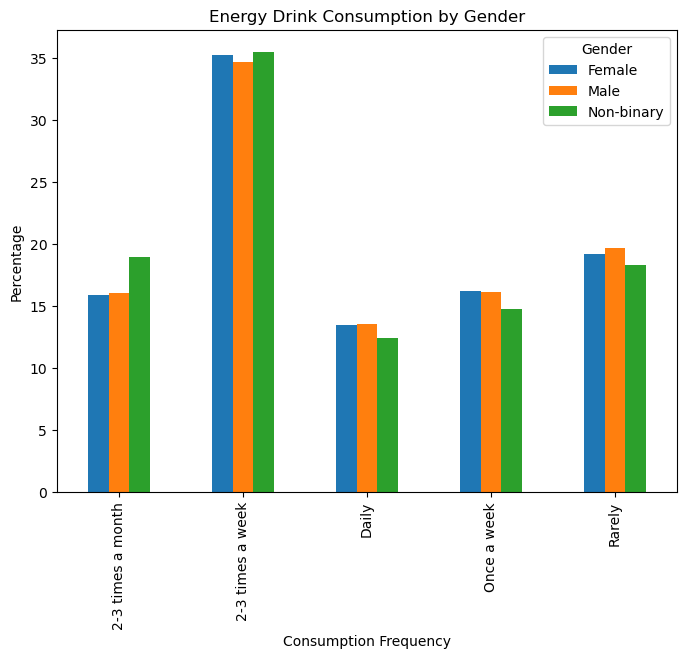

In [27]:
# Consumption frequency breakup by gender
gender_pref_pct.T.plot(kind='bar', figsize=(8,6))
plt.title("Energy Drink Consumption by Gender")
plt.ylabel("Percentage")
plt.xlabel("Consumption Frequency")
plt.legend(title="Gender")
plt.show()


## Which Age group likes the drinks more?

In [40]:
response_all['Age'].value_counts(normalize=True) * 100

Age
19-30    55.20
31-45    23.76
15-18    14.88
46-65     4.26
65+       1.90
Name: proportion, dtype: float64

In [50]:
# Total respondents in each age group
age_total = response_all['Age'].value_counts()

# Daily consumers in each age group
age_daily = response_all[response_all['Consume_frequency'] == "Daily"]['Age'].value_counts()

# Compute percentage of Daily consumers within each age group
daily_share = (age_daily / age_total * 100).sort_values(ascending=False)

daily_share




Age
31-45    14.646465
19-30    13.333333
15-18    13.172043
65+      12.631579
46-65     9.859155
Name: count, dtype: float64


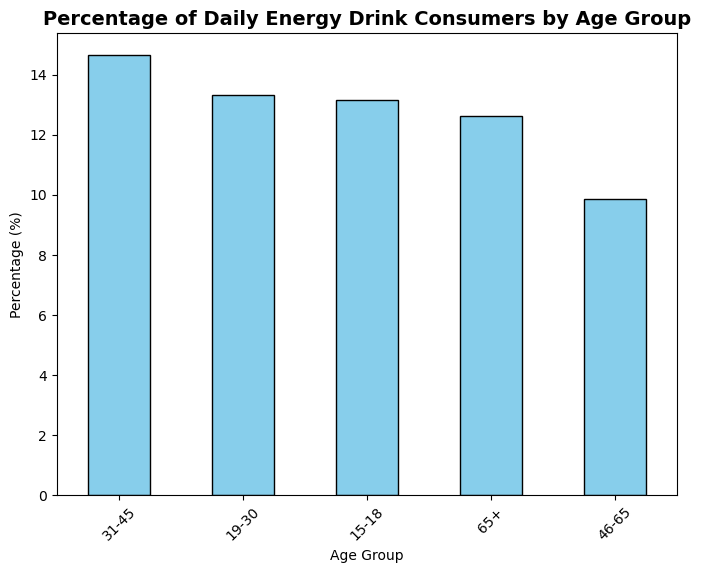

In [51]:

daily_share.plot(kind='bar', figsize=(8,6), color='skyblue', edgecolor='black')
plt.title("Percentage of Daily Energy Drink Consumers by Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


In [41]:
# Crosstab: Age vs Consumption frequency
age_pref = pd.crosstab(response_all['Age'], response_all['Consume_frequency'])

# Add percentages row-wise
age_pref_pct = pd.crosstab(
    response_all['Age'], 
    response_all['Consume_frequency'], 
    normalize='index'
) * 100


age_pref_pct

Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
Age,,,,,
15-18,15.591398,36.223118,13.172043,16.397849,18.615591
19-30,16.141304,34.728261,13.333333,16.086957,19.710145
31-45,16.750842,34.048822,14.646465,15.193603,19.360269
46-65,15.492958,36.384977,9.859155,20.187793,18.075117
65+,13.684211,37.368421,12.631579,15.789474,20.526316


## Which type of marketing reaches the most Youth (15-30)?

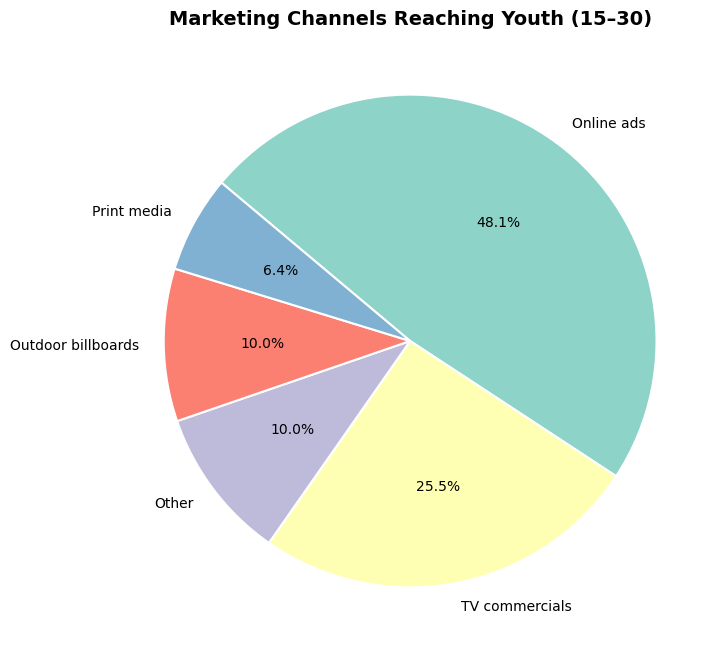

In [46]:
# Filter only youth age groups
youth = response_all[response_all['Age'].isin(['15-18', '19-30'])]
# Count responses by marketing channel within youth
channel_counts = youth['Marketing_channels'].value_counts()
# Percentage distribution
channel_pct = youth['Marketing_channels'].value_counts(normalize=True) * 100

# Pie chart for youth marketing channels
plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # nice pastel color palette

channel_pct.plot(
    kind='pie', 
    autopct='%1.1f%%',   # show percentages
    startangle=140,      # rotate start
    counterclock=False,  # clockwise
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}  # clean edges
)

plt.title("Marketing Channels Reaching Youth (15–30)", fontsize=14, fontweight='bold')
plt.ylabel("")   # remove unnecessary y-label
plt.show()

# Consumer preferences

## What are the preferred ingredients of energy drinks among respondents?

In [53]:
response_all.Ingredients_expected.unique()

array(['Guarana', 'Caffeine', 'Vitamins', 'Sugar'], dtype=object)

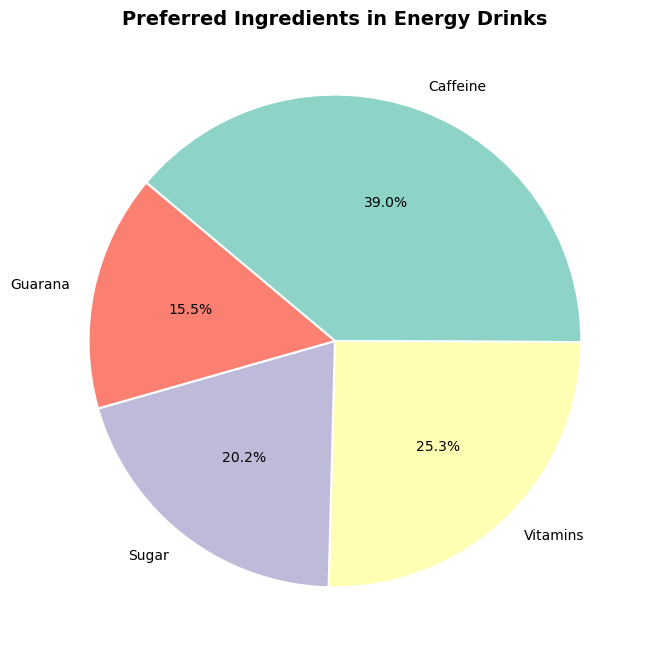

In [61]:
# Count responses and convert to percentage
ingredient_pct = response_all['Ingredients_expected'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

ingredient_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Preferred Ingredients in Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()


In [57]:
# For each Age group, get the most preferred ingredient
top_ingr_by_age = (
    response_all.groupby('Age')['Ingredients_expected']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Most preferred ingredient by each age group:\n")
print(top_ingr_by_age)


Most preferred ingredient by each age group:

Age
15-18    Caffeine
19-30    Caffeine
31-45    Caffeine
46-65    Caffeine
65+      Caffeine
Name: Ingredients_expected, dtype: object


## What packaging preferences do respondents have for energy drinks?

In [59]:
response_all.Packaging_preference.unique()

array(['Compact and portable cans', 'Innovative bottle design', 'Other',
       'Eco-friendly design', 'Collectible packaging'], dtype=object)

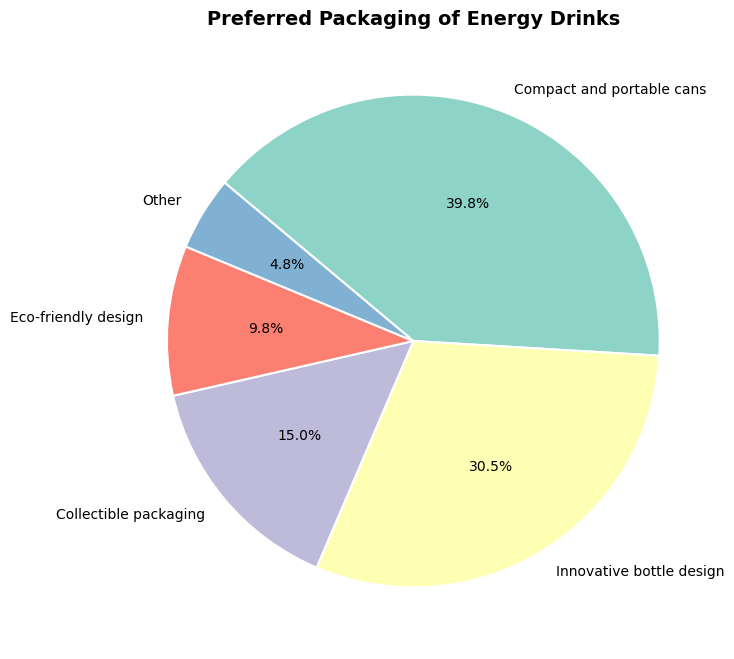

In [62]:
# Count responses and convert to percentage
Pack_pref_pct = response_all['Packaging_preference'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Pack_pref_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Preferred Packaging of Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [63]:
# For each Age group, get the most preferred ingredient
top_pack_pref_by_age = (
    response_all.groupby('Age')['Packaging_preference']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Most preferred packaging by each age group:\n")
print(top_pack_pref_by_age)

Most preferred packaging by each age group:

Age
15-18    Compact and portable cans
19-30    Compact and portable cans
31-45    Compact and portable cans
46-65    Compact and portable cans
65+      Compact and portable cans
Name: Packaging_preference, dtype: object


## When do customers typically consume energy drinks?

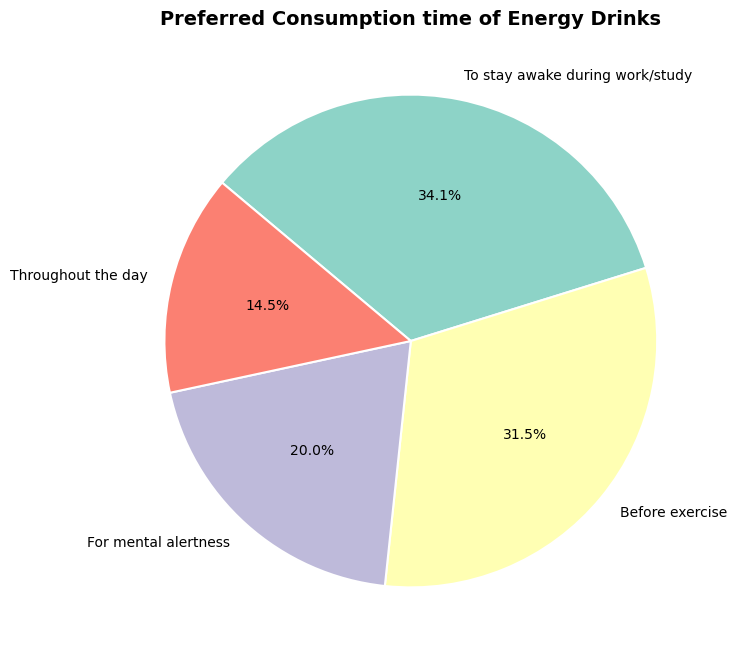

In [98]:
# Count responses and convert to percentage
Consump_time_pct = response_all['Consume_time'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Consump_time_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Preferred Consumption time of Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [100]:
# For each Age group, get the most preferred ingredient
consume_time_pref_by_age = (
    response_all.groupby('Age')['Consume_time']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Most preferred consumption time by each age group:\n")
print(consume_time_pref_by_age)

Most preferred consumption time by each age group:

Age
15-18    To stay awake during work/study
19-30    To stay awake during work/study
31-45    To stay awake during work/study
46-65               For mental alertness
65+      To stay awake during work/study
Name: Consume_time, dtype: object


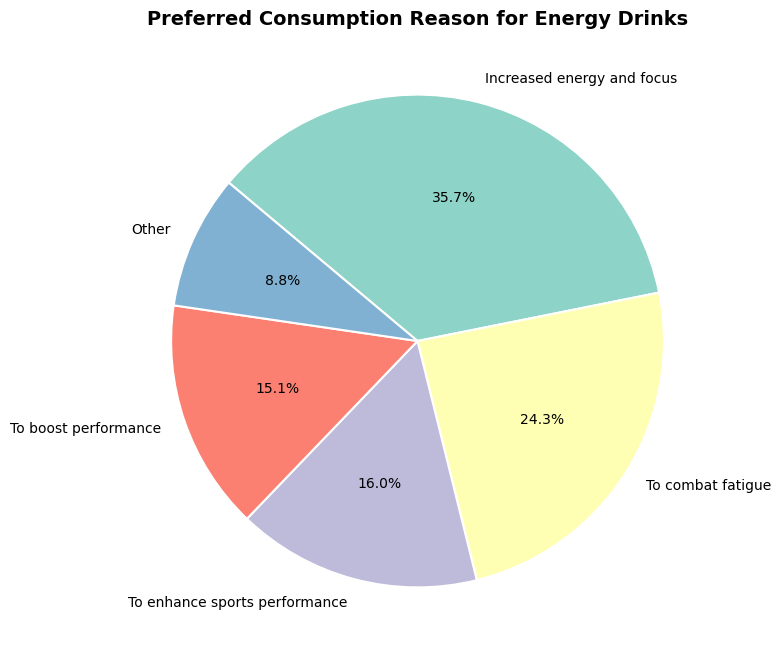

In [101]:
# Count responses and convert to percentage
Consump_reason_pct = response_all['Consume_reason'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Consump_reason_pct .plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Preferred Consumption Reason for Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [103]:
# For each Age group, get the most preferred ingredient
consume_reason_pref_by_age = (
    response_all.groupby('Age')['Consume_reason']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Most preferred consumption time by each age group:\n")
print(consume_reason_pref_by_age)

Most preferred consumption time by each age group:

Age
15-18    Increased energy and focus
19-30    Increased energy and focus
31-45    Increased energy and focus
46-65    Increased energy and focus
65+      Increased energy and focus
Name: Consume_reason, dtype: object


# Competition Analysis

## Who are the current market leaders?

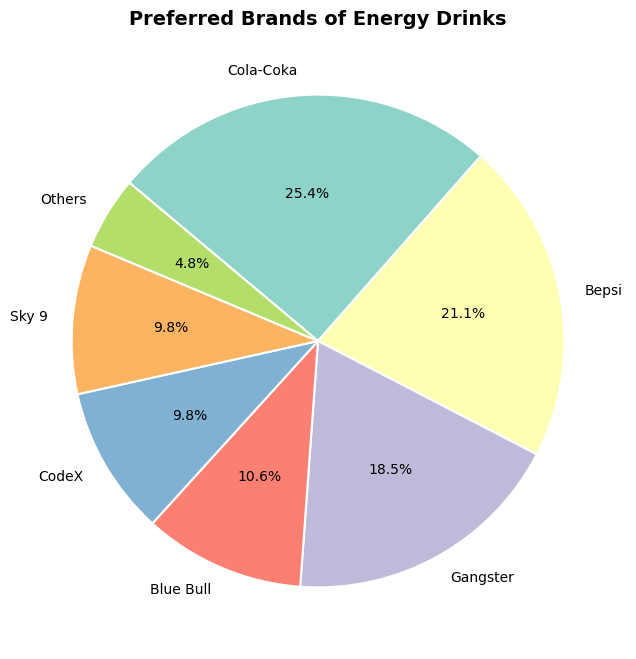

In [68]:
# Count responses and convert to percentage
Competitor_mark_pct = response_all['Current_brands'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Competitor_mark_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Preferred Brands of Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [67]:
# Youth Preference
Youth_pref_pct = youth['Current_brands'].value_counts(normalize=True) * 100
Youth_pref_pct

Current_brands
Cola-Coka    25.156963
Bepsi        20.976027
Gangster     18.835616
Blue Bull    10.702055
Sky 9         9.803082
CodeX         9.631849
Others        4.894406
Name: proportion, dtype: float64

## What are the primary reasons consumers prefer those brands over ours?

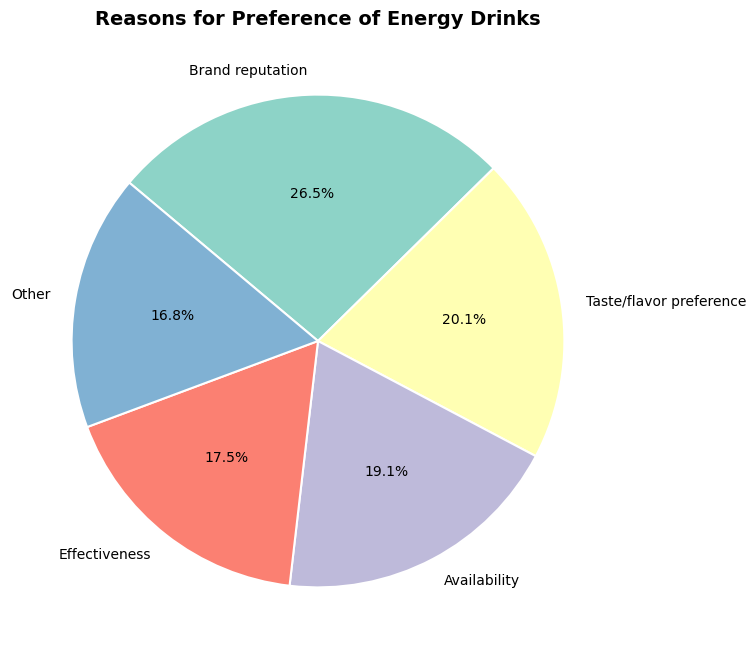

In [70]:
# Count responses and convert to percentage
Pref_reason_pct = response_all['Reasons_for_choosing_brands'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Pref_reason_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Reasons for Preference of Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [71]:
# Youth Preference
Youth_pref_reas_pct = youth['Reasons_for_choosing_brands'].value_counts(normalize=True) * 100
Youth_pref_reas_pct

Reasons_for_choosing_brands
Brand reputation           27.682648
Taste/flavor preference    21.247146
Availability               18.807078
Effectiveness              16.566781
Other                      15.696347
Name: proportion, dtype: float64

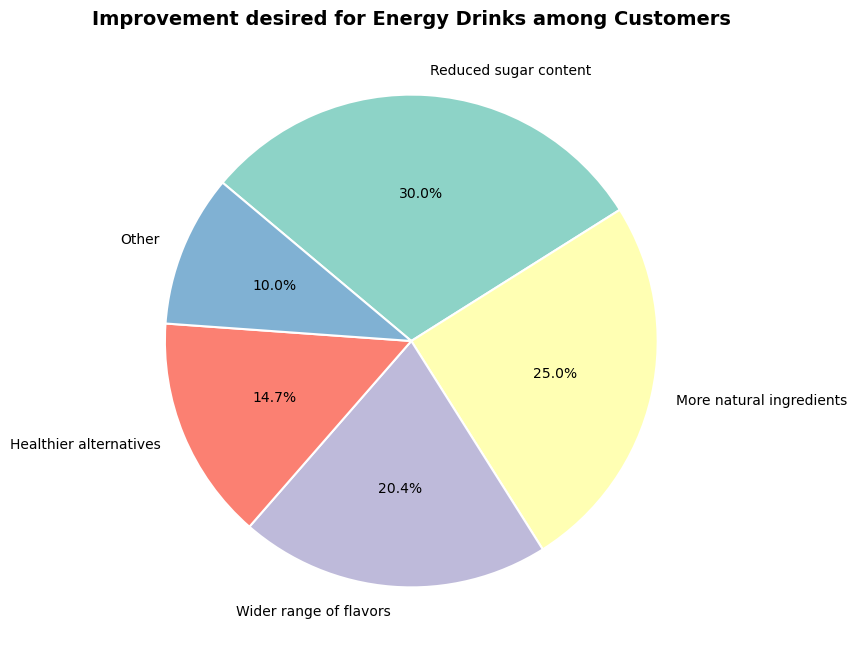

# Marketing Channels and Brand Awareness:

## Which marketing channel can be used to reach more customers?

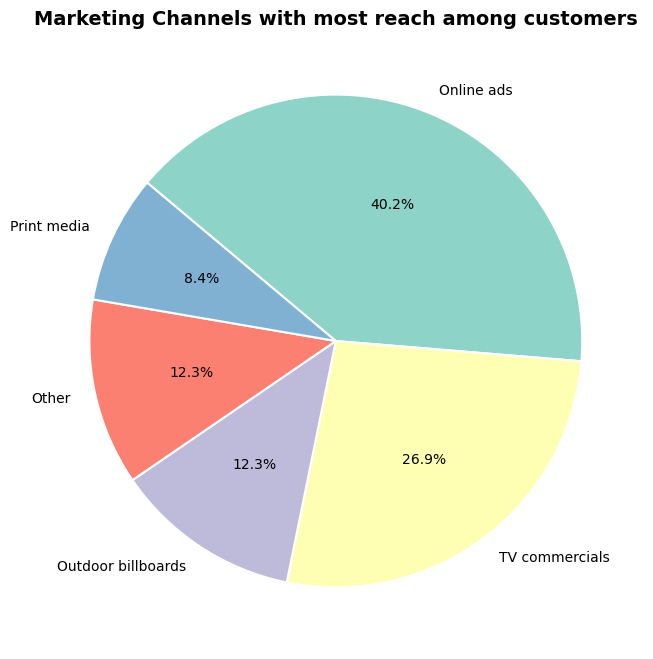

In [73]:
# Count responses and convert to percentage
Pref_channel_pct = response_all['Marketing_channels'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Pref_channel_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Marketing Channels with most reach among customers", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

# Brand Penetration

## What do people think about our brand? (overall rating)

In [81]:
# Percentage distribution of Tried_before responses
tried_split = response_all['Tried_before'].value_counts(normalize=True) * 100
print(tried_split)

Tried_before
No     51.19
Yes    48.81
Name: proportion, dtype: float64


In [74]:
tried = response_all[response_all['Tried_before'] == "Yes"]
# Overall average
overall_avg = tried['Taste_experience'].mean()

# Average per age group
avg_by_age = tried.groupby('Age')['Taste_experience'].mean().sort_values(ascending=False)

print("Overall Average Rating:", round(overall_avg, 2))
print("\nAverage Rating by Age Group:\n", avg_by_age)


Overall Average Rating: 3.27

Average Rating by Age Group:
 Age
15-18    3.307692
46-65    3.286408
19-30    3.268411
31-45    3.255337
65+      3.108911
Name: Taste_experience, dtype: float64


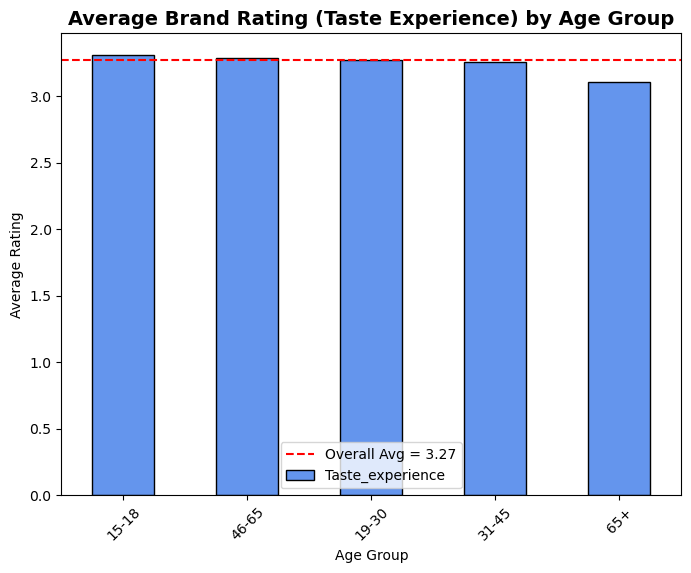

In [75]:

plt.figure(figsize=(8,6))
avg_by_age.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Avg = {overall_avg:.2f}')

plt.title("Average Brand Rating (Taste Experience) by Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Average Rating")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [77]:
# Reasons for not trying in percentage
not_tried = response_all[response_all['Tried_before'] == "No"]
reasons_pct = not_tried['Reasons_preventing_trying'].value_counts(normalize=True) * 100
print(reasons_pct)

Reasons_preventing_trying
Health concerns                    23.383473
Not interested in energy drinks    23.031842
Not available locally              22.758351
Unfamiliar with the brand          20.121117
Other                              10.705216
Name: proportion, dtype: float64


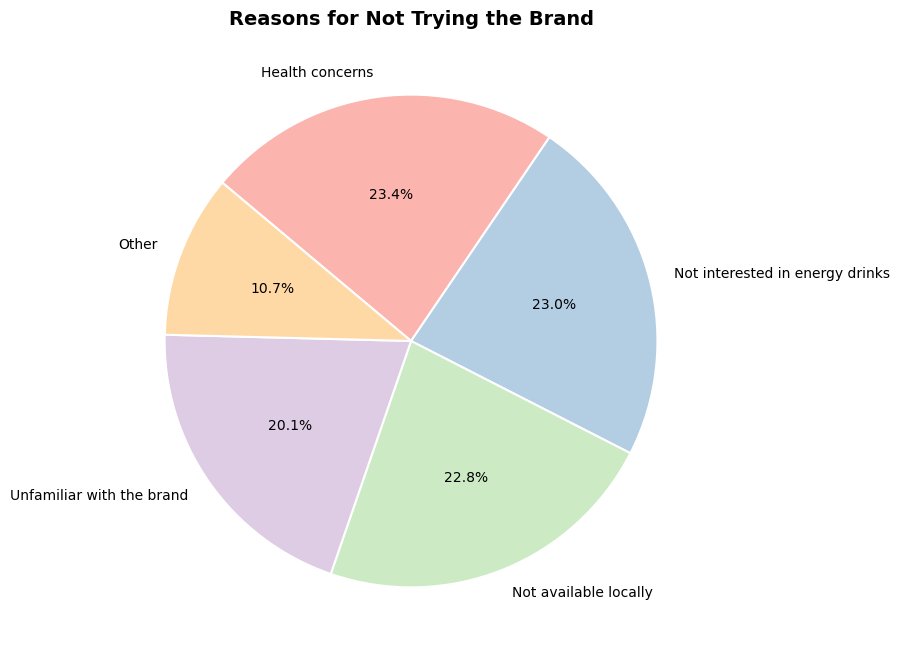

In [79]:

plt.figure(figsize=(8,8))
colors = plt.cm.Pastel1.colors  # soft pastel colors

reasons_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Reasons for Not Trying the Brand", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()


## Peoples opinion on brand perception about logo,design, have they head before etc?

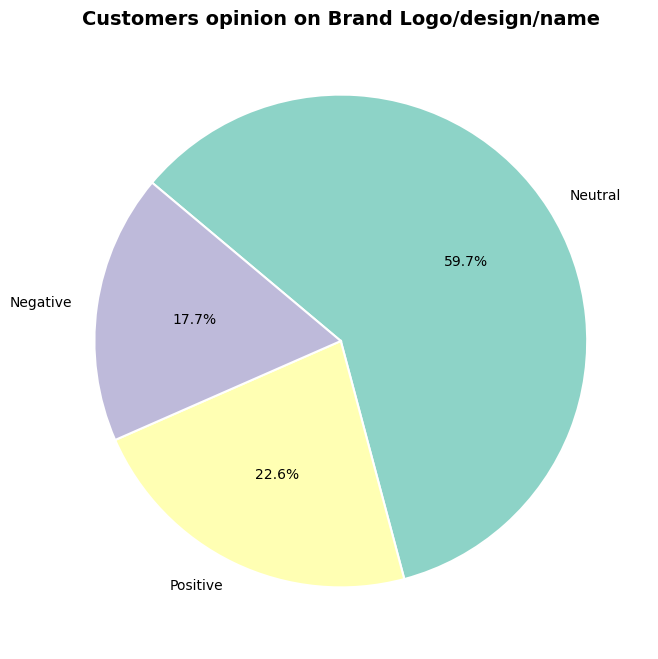

In [82]:
# Count responses and convert to percentage
Logo_percep_pct = response_all['Brand_perception'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Logo_percep_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Customers opinion on Brand Logo/design/name", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

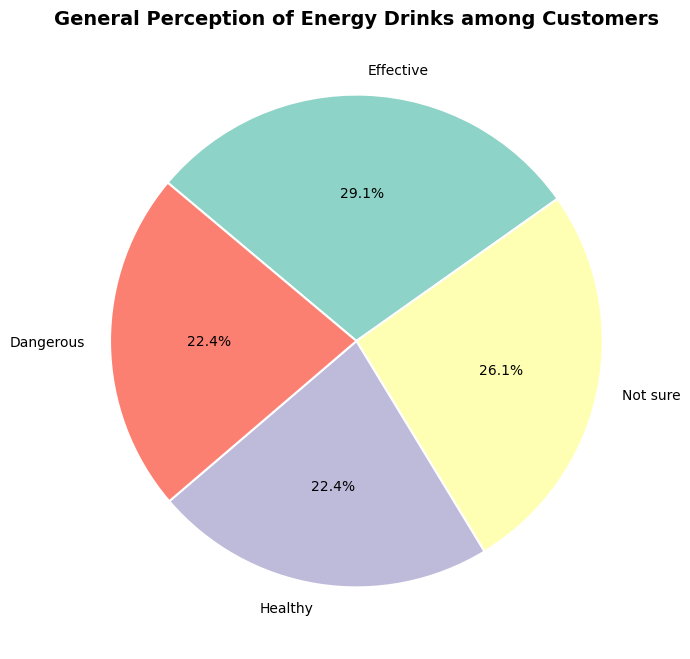

In [83]:
# Count responses and convert to percentage
General_percep_pct = response_all['General_perception'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

General_percep_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("General Perception of Energy Drinks among Customers", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [97]:

general_percep_by_age = (
    response_all.groupby('Age')['General_perception']
    .apply(lambda x: x.value_counts().idxmax())
)

print("General perception by each age group:\n")
print(general_percep_by_age)

General perception by each age group:

Age
15-18    Effective
19-30     Not sure
31-45    Dangerous
46-65    Dangerous
65+      Effective
Name: General_perception, dtype: object


In [106]:
# Total respondents in each City
all_cities = response_all['City'].value_counts()

# Daily consumers in each City
city_daily = response_all[response_all['Consume_frequency'] == "Daily"]['City'].value_counts()

# Compute percentage of Daily consumers within each City
city_share = (city_daily / all_cities * 100).sort_values(ascending=False)

print(city_share)


City
Chennai      40.341515
Delhi        37.995338
Jaipur       25.277778
Lucknow      19.428571
Bangalore    10.678925
Mumbai        9.470199
Pune          9.050773
Ahmedabad     5.701754
Kolkata       5.653710
Hyderabad     5.182761
Name: count, dtype: float64


In [113]:
# Counts per City x Brand
brand_counts = (
    response_all
    .groupby(['City', 'Current_brands'])
    .size()
    .unstack(fill_value=0)
)

# Market share (%) per city
brand_share_pct = brand_counts.div(brand_counts.sum(axis=1), axis=0) * 100

# Ensure Codex column exists (even if missing in some cities)
if 'CodeX' not in brand_share_pct.columns:
    brand_share_pct['CodeX'] = 0

# Codex vs Others
codex_share = brand_share_pct['CodeX']  # guaranteed Series now
codex_vs_others = pd.DataFrame({
    'CodeX': codex_share,
    'Others': 100 - codex_share
}).sort_values('CodeX', ascending=False)

print("CodeX vs Others market share (%), by City:\n")
codex_vs_others.round(2)

CodeX vs Others market share (%), by City:



,CodeX,Others
City,,
Mumbai,10.33,89.67
Bangalore,10.33,89.67
Pune,10.15,89.85
Hyderabad,9.93,90.07
Ahmedabad,9.87,90.13
Chennai,9.82,90.18
Delhi,9.32,90.68
Kolkata,8.48,91.52
Jaipur,7.78,92.22


# Purchase Behaviour

## Where do respondents prefer to purchase energy drinks?

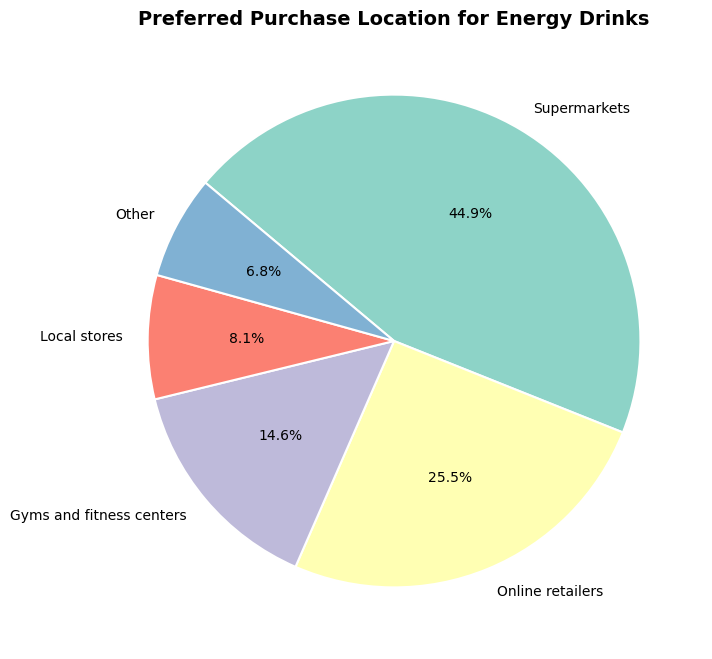

In [86]:
# Count responses and convert to percentage
Location_pref_pct = response_all['Purchase_location'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

Location_pref_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Preferred Purchase Location for Energy Drinks", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [87]:
# For each Age group, get the most preferred purchase location
purchase_pref_by_age = (
    response_all.groupby('Age')['Purchase_location']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Prefered location for purchase by each age group:\n")
print(purchase_pref_by_age)

Prefered location for purchase by each age group:

Age
15-18    Supermarkets
19-30    Supermarkets
31-45    Supermarkets
46-65    Supermarkets
65+      Supermarkets
Name: Purchase_location, dtype: object


## What are the typical consumption situations for energy drinks among respondents?

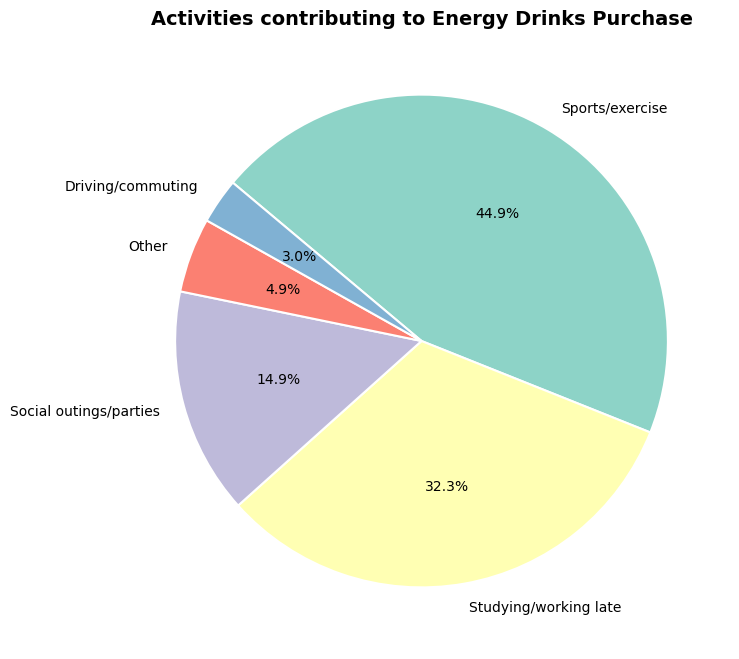

In [88]:
# Count responses and convert to percentage
activity_pct = response_all['Typical_consumption_situations'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

activity_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Activities contributing to Energy Drinks Purchase", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [89]:
# For each Age group, get the most frequent situation/activity leading to consuming energy drink
purchase_situation_by_age = (
    response_all.groupby('Age')['Typical_consumption_situations']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Activities/Situations leading to purchase of Energy Drinks by each age group:\n")
print(purchase_situation_by_age)

Activities/Situations leading to purchase of Energy Drinks by each age group:

Age
15-18    Sports/exercise
19-30    Sports/exercise
31-45    Sports/exercise
46-65    Sports/exercise
65+      Sports/exercise
Name: Typical_consumption_situations, dtype: object


In [90]:
# For each Age group, get the most preferred Price-Range
price_range_by_age = (
    response_all.groupby('Age')['Price_range']
    .apply(lambda x: x.value_counts().idxmax())
)

print("Prefered Price Range by each age group:\n")
print(price_range_by_age)

Prefered Price Range by each age group:

Age
15-18        50-99
19-30        50-99
31-45      100-150
46-65    Above 150
65+       Below 50
Name: Price_range, dtype: object


In [94]:
# Percentage distribution of limited edition packaging responses
packaging_split = response_all['Limited_edition_packaging'].value_counts(normalize=True) * 100
packaging_split

Limited_edition_packaging
No          40.23
Yes         39.46
Not Sure    20.31
Name: proportion, dtype: float64

# Product Development

## Are people concerned about the health benefits? 

In [95]:
# Percentage distribution of Health_concerns responses
Health_split = response_all['Health_concerns'].value_counts(normalize=True) * 100
Health_split

Health_concerns
Yes    60.45
No     39.55
Name: proportion, dtype: float64

In [96]:
# Percentage distribution of interested_in_organic responses
organic_split = response_all['Interest_in_natural_or_organic'].value_counts(normalize=True) * 100
organic_split

Interest_in_natural_or_organic
Yes         49.83
No          30.62
Not Sure    19.55
Name: proportion, dtype: float64

## What improvements would you like to see in energy drinks currently available in the market?

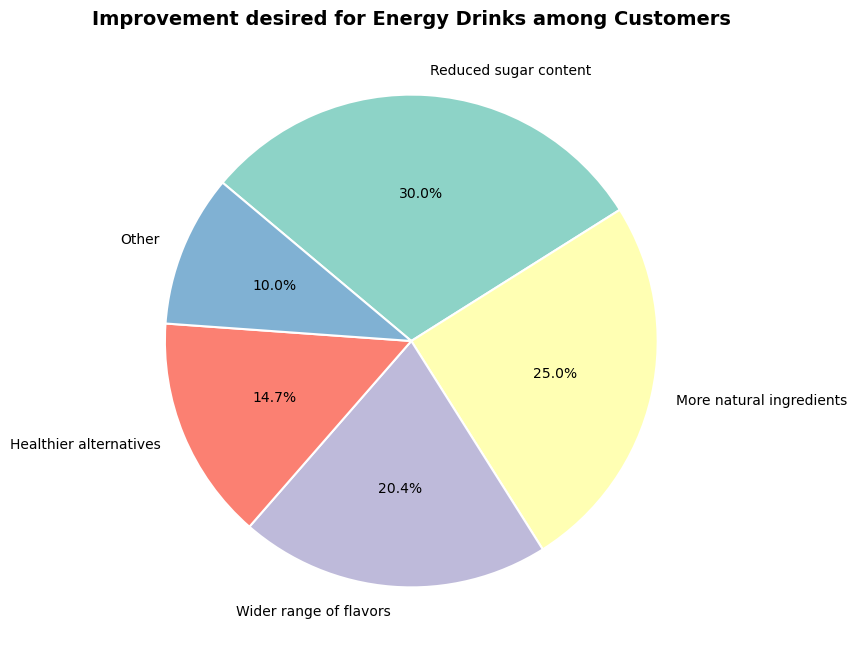

In [104]:
# Count responses and convert to percentage
improv_pct = response_all['Improvements_desired'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  # pastel color palette

improv_pct.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    counterclock=False, 
    colors=colors,
    wedgeprops={'edgecolor':'white','linewidth':1.5}
)

plt.title("Improvement desired for Energy Drinks among Customers", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label
plt.show()

In [105]:
# Percentage distribution of Heard_before responses
heard_split = response_all['Heard_before'].value_counts(normalize=True) * 100
print(heard_split)

Heard_before
No     55.53
Yes    44.47
Name: proportion, dtype: float64
